# Intuition for Second Order Partial Derivatives and the Hessian Matrix
> But what is a Hessian, really? 


In [4]:
#collapse
# imports
# using Plots; plotlyjs()
using PlotlyJS

# from IPython.display import HTML
# HTML(fig.to_html()) # where fig = plotly.plot(...)

The Hessian matrix appears in the optimization literature, but the intuition for how the Hessian and its inverse transform vectors is opaque to me. Let's review second order partial derivatives, and then try to build intuition for the Hessian matrix. 

For the purpose of this intuition-building exercise, we'll work with functions $\Reals^2 \mapsto \Reals^1$.

Recall, a partial derivative is the change in an "output" variable with respect to infinitesimal changes in an "input" variable. Suppose $f(x, y) = x^2 + 2y^2$. Then $\frac{\partial}{\partial x} f(x, y) = 2x$


<!-- , which tells us that anywhere in the x, y domain, if we increase x slightly, we increase the slope of f slightly.  -->

In [2]:
f(x, y) = x^2 + 2y^2

x = 6

xlim=[-10, x]
ylim=[-10, 10]

xs = LinRange(xlim..., 101)
ys = LinRange(ylim..., 101)
zs = [f(x, y) for x in xs, y in ys]

y = 4
dy = 4
f_y(y) = 4y

f_y (generic function with 1 method)

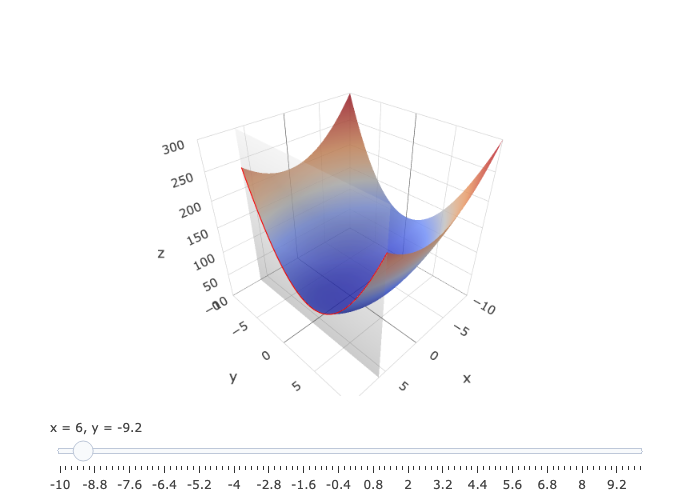

In [40]:
#collapse
# built interactive plot
traces = GenericTrace[]

push!(traces, PlotlyJS.surface(x=xs, y=ys, z=zs,
        visible=true, showscale=false, opacity=0.8))
push!(traces, PlotlyJS.surface(x=[x, x+0.001], y=ylim, z=[[maximum(zs), minimum(zs)] [maximum(zs), minimum(zs)]],
        visible=true, showscale=false, colorscale="Greys", opacity=0.2))
push!(traces, PlotlyJS.scatter3d(x=fill(x, size(ys)), y=ys, z=[x^2 + 2y^2 for y in ys],
        visible=true, showlegend=false, mode="lines", line=attr(color="red", width=2)))

for y in ys
    push!(traces, PlotlyJS.scatter3d(x=fill(x, 2),y=[y-dy, y+dy], z=[f(x,y)-f_y(y)*dy, f(x,y)+f_y(y)*dy],
            mode="lines", visible=false, showlegend=false, line=attr(color="orange", width=5)))
end

layout = Layout(
    sliders=[attr(
        steps=[
            attr(
                label=round(y, digits=2),
                method="update",
                args=[attr(visible=[fill(true, 3); fill(false, i-1); true; fill(false, 101-i)])]
            )
            for (i, y) in enumerate(ys)
        ],
        active = y,
        currentvalue_prefix="x = 6, y = ",
        # pad_t=40
    )],
    scene = attr(
        xaxis = attr(range=[-10,10]),
        yaxis = attr(range=[-10,10]),
        zaxis = attr(range=[0,300])
    ),
)

p = PlotlyJS.plot(traces, layout)

In [24]:
xs = LinRange(-10, 10, 100)
ys = LinRange(-10, 10, 100)
z1s = [-x^2 - 2y^2 + 100 for x in xs, y in ys]

# zs = LinRange(minimum(z1s), maximum(z1s), 100)
# y2s = [3 for x in xs, z in zs]


surface!(xs, ys, z1s, colorbar=:none, color=cgrad(:blues))
# surface!(xs, y2s, zs)


<!DOCTYPE html>
 
 
 Plots.jl

In [10]:
xs = LinRange(-10, 10, 100)
ys = LinRange(-10, 10, 100)
zs = [x^2 + 2y^2 for x in xs, y in ys]

# z2s = LinRange(minimum(zs), maximum(zs), 2)
# y2s = [2 for x in xs, zs in z2s]

surface(xs, zs, ys, colorbar=false, color=cgrad(:blues))

<!DOCTYPE html>
 
 
 Plots.jl

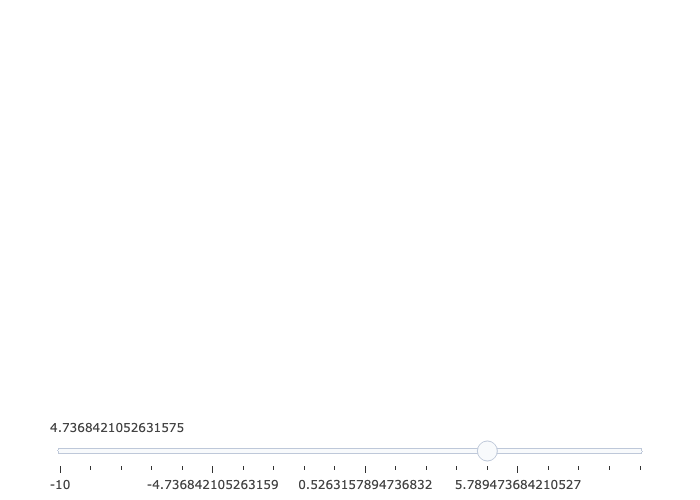

In [12]:

# what is the zero doing after the attr in the args list?


for y in LinRange(ylim..., 20)

    push!(traces, scatter3d(;x=fill(x, 2), y=[y-dy, y+dy], z=[f(x,y)-f_y(y)*dy, f(x,y)+f_y(y)*dy], mode="lines", visible=False))

end

layout = Layout(
    sliders=[attr(
        steps=[
            attr(
                label=y,
                method="update",
                args=[attr(visible=[fill(false, 20); 1; fill(false, 20)]   )]
            )
            for y in LinRange(ylim..., 20)
        ],
        active = 14,
        # currentvalue_prefix="Assets: ",
        # pad_t=40
    )],
    # width=500,
    # height=500,
)

p = plot(traces, layout)


In [ ]:
gradient field

In [81]:
?attr

search: attr attr! plotattr scatter scatter! scattergl scatter3d scatter3d!



No documentation found.

`PlotlyBase.attr` is a `Function`.

```
# 2 methods for generic function "attr":
[1] attr() in PlotlyBase at /Users/alex/.julia/packages/PlotlyBase/GDbp9/src/traces_layouts.jl:46
[2] attr(fields; kwargs...) in PlotlyBase at /Users/alex/.julia/packages/PlotlyBase/GDbp9/src/traces_layouts.jl:46
```


gradient field

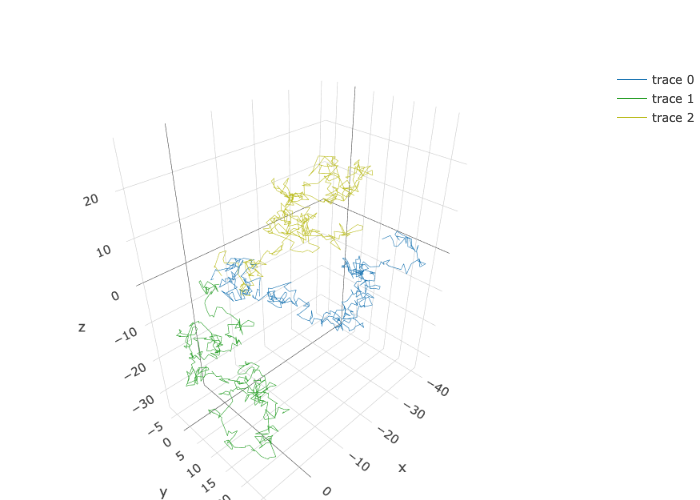

In [114]:
function random_line()
    n = 400
    rw() = cumsum(randn(n))
    trace1 = PlotlyJS.scatter3d(;x=rw(),y=rw(), z=rw(), mode="lines",
                        marker=attr(color="#1f77b4", size=12, symbol="circle",
                                    line=attr(color="rgb(0,0,0)", width=0)),
                        line=attr(color="#1f77b4", width=1))
    trace2 = PlotlyJS.scatter3d(;x=rw(),y=rw(), z=rw(), mode="lines",
                        marker=attr(color="#9467bd", size=12, symbol="circle",
                                    line=attr(color="rgb(0,0,0)", width=0)),
                        line=attr(color="rgb(44, 160, 44)", width=1))
    trace3 = PlotlyJS.scatter3d(;x=rw(),y=rw(), z=rw(), mode="lines",
                        marker=attr(color="#bcbd22", size=12, symbol="circle",
                                    line=attr(color="rgb(0,0,0)", width=0)),
                        line=attr(color="#bcbd22", width=1))
    layout = Layout(autosize=false, width=500, height=500,
                    margin=attr(l=0, r=0, b=0, t=65))
    PlotlyJS.plot([trace1, trace2, trace3], layout)
end
random_line()